## Imports

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict


num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [5]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [6]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

In [7]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)

In [8]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [9]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [10]:
x_train.shape

(12660, 784)

In [11]:
# # Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(12660, 10)
(4170, 10)


# Neural Networks

## Buiding MLP Architecture

In [12]:
# Specifying Sequential Model
model = Sequential()

In [13]:
# Dense Adds fully connected nodes in each layer 

# Input layer is the number of pixels & their values 

# Layer 1
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))


## Compiling the model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Visualising ANN arcitecture. (Takes a long time to run!)

In [16]:
# https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

In [17]:
y_train.shape

(12660, 10)

## Training the Model

In [18]:
trained_network_output = model.fit(x_train,y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/10
12660/12660 [==============================] - 11s 846us/step - loss: 0.8325 - accuracy: 0.7375 - val_loss: 0.6286 - val_accuracy: 0.7739
Epoch 2/10
12660/12660 [==============================] - 10s 826us/step - loss: 0.3803 - accuracy: 0.8730 - val_loss: 0.4441 - val_accuracy: 0.8691
Epoch 3/10
12660/12660 [==============================] - 11s 863us/step - loss: 0.2831 - accuracy: 0.9085 - val_loss: 0.7233 - val_accuracy: 0.8302
Epoch 4/10
12660/12660 [==============================] - 10s 796us/step - loss: 0.2200 - accuracy: 0.9290 - val_loss: 0.5479 - val_accuracy: 0.8501
Epoch 5/10
12660/12660 [==============================] - 10s 811us/step - loss: 0.2077 - accuracy: 0.9342 - val_loss: 0.3526 - val_accuracy: 0.9175
Epoch 6/10
12660/12660 [==============================] - 11s 847us/step - loss: 0.1603 - accuracy: 0.9461 - val_loss: 0.3469 - val_accuracy: 0.9204
Epoch 7/10
12660/12660 [==============================] -

# Evaluation

### Accuracy of training model

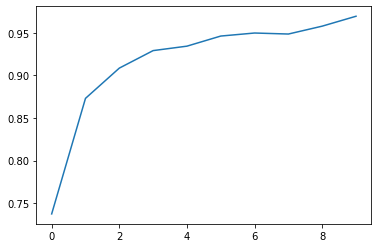

In [19]:
plt.plot(trained_network_output.history['accuracy'])

### Accuracy of training and validation set

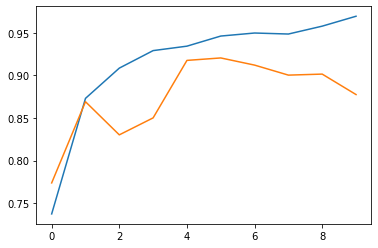

In [20]:
plt.plot(trained_network_output.history['accuracy'])
plt.plot(trained_network_output.history['val_accuracy'])

In [21]:
# Evalutation the model
score = model.evaluate(x_test, y_test)

4170/4170 [==============================] - 1s 168us/step


In [22]:
score
# 90% accuaracy!!!

[0.5334791995852971, 0.8774580359458923]

## 10-fold cross valiadation

In [23]:
# Method to construct a set MLP model
def construct_new_model():
    
    # Specifying a sequential modle 
    model = Sequential()
    
    # Dense Adds fully connected nodes in each layer 
    # Input layer is the number of pixels & their values 
    # Layer 1
    model.add(Dense(512, activation = 'relu',input_shape=(784,)))

    # Layer 2
    model.add(Dense(512, activation = 'relu'))
    
    # Output Layer
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

    

In [24]:
# Uniformly separates classes in folds: See video @12:00 https://www.youtube.com/watch?v=gJo0uNL-5Qw
# Proportion of classes is same accross all folds
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [25]:
# Ref:[https://www.youtube.com/watch?v=gJo0uNL-5Qw] - Used to make code more concise 
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))
    return model.evaluate(x_test, y_test)

In [45]:
# Modification of above method
def get_network_output(model, x_train, x_test, y_train, y_test):
    x = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))
    return x

In [27]:
# Empty list to to which we wil append each folds acccuaracy 
ScoreArray = []

In [28]:
# https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train.argmax(1))):
    x_train_kf, x_test_kf = x_train[train_index], x_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    ScoreArray.append(get_score(construct_new_model(), x_train_kf, x_test_kf, y_train_kf, y_test_kf))


Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 9s 805us/step - loss: 0.8508 - accuracy: 0.7336 - val_loss: 0.6414 - val_accuracy: 0.7891
Epoch 2/5
11394/11394 [==============================] - 9s 781us/step - loss: 0.3764 - accuracy: 0.8783 - val_loss: 0.2609 - val_accuracy: 0.9179
Epoch 3/5
11394/11394 [==============================] - 10s 851us/step - loss: 0.3125 - accuracy: 0.8961 - val_loss: 0.2217 - val_accuracy: 0.9400
Epoch 4/5
11394/11394 [==============================] - 9s 797us/step - loss: 0.2680 - accuracy: 0.9088 - val_loss: 0.1990 - val_accuracy: 0.9265
Epoch 5/5
1266/1266 [==============================] - 0s 184us/step
Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 9s 780us/step - loss: 0.9081 - accuracy: 0.7166 - val_loss: 0.3811 - val_accuracy: 0.8918
Epoch 2/5
11394/11394 [==============================] - 7s 609us/step - loss: 0.3583 - accuracy:

Epoch 5/5
1266/1266 [==============================] - 0s 184us/step


In [29]:
ScoreArray = np.array(ScoreArray)
ScoreArray[:,1:2]

array([[0.85150081],
       [0.89178514],
       [0.86650866],
       [0.89099526],
       [0.94865721],
       [0.97077411],
       [0.92890996],
       [0.93759876],
       [0.9312796 ],
       [0.9273302 ]])

In [30]:
# Average accuracy across the 10 folds
print(np.mean(ScoreArray[:,1:2]))

0.9145339727401733


# Moving 4000 images from training to test set

In [31]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 784)
(12660, 10)
(4170, 784)
(4170, 10)


In [32]:
x_train_new = x_train[0:8660,:]
y_train_new = y_train[0:8660,:]

x_temp = x_train[8660:12660,:]
y_temp = y_train[8660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))





In [46]:
test = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

Train on 6660 samples, validate on 10170 samples
Epoch 1/20
6660/6660 [==============================] - 6s 912us/step - loss: 1.0721 - accuracy: 0.6640 - val_loss: 0.6903 - val_accuracy: 0.7712
Epoch 2/20
6660/6660 [==============================] - 6s 907us/step - loss: 0.5425 - accuracy: 0.8221 - val_loss: 0.4688 - val_accuracy: 0.8399
Epoch 3/20
6660/6660 [==============================] - 4s 623us/step - loss: 0.3777 - accuracy: 0.8700 - val_loss: 0.3599 - val_accuracy: 0.8858
Epoch 4/20
6660/6660 [==============================] - 6s 913us/step - loss: 0.3078 - accuracy: 0.8998 - val_loss: 0.6914 - val_accuracy: 0.8347
Epoch 5/20
6660/6660 [==============================] - 7s 977us/step - loss: 0.3013 - accuracy: 0.8983 - val_loss: 0.4382 - val_accuracy: 0.8848
Epoch 6/20
6660/6660 [==============================] - 8s 1ms/step - loss: 0.2377 - accuracy: 0.9242 - val_loss: 0.3291 - val_accuracy: 0.9167
Epoch 7/20
6660/6660 [==============================] - 8s 1ms/step - loss: 0

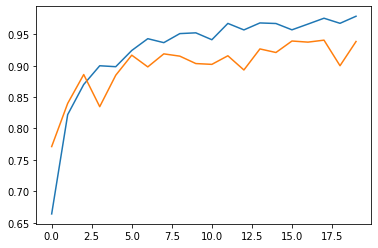

In [48]:
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])

# Moving 9000 images from training to test set


In [49]:
x_train_new = x_train[0:6660,:]
y_train_new = y_train[0:6660,:]

x_temp = x_train[6660:12660,:]
y_temp = y_train[6660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))

In [50]:
test2 = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

Train on 6660 samples, validate on 10170 samples
Epoch 1/20
6660/6660 [==============================] - 8s 1ms/step - loss: 1.1158 - accuracy: 0.6422 - val_loss: 0.6459 - val_accuracy: 0.7904
Epoch 2/20
6660/6660 [==============================] - 7s 1ms/step - loss: 0.5324 - accuracy: 0.8191 - val_loss: 0.5361 - val_accuracy: 0.8352
Epoch 3/20
6660/6660 [==============================] - 7s 1ms/step - loss: 0.3750 - accuracy: 0.8731 - val_loss: 0.5299 - val_accuracy: 0.8222
Epoch 4/20
6660/6660 [==============================] - 8s 1ms/step - loss: 0.3309 - accuracy: 0.8893 - val_loss: 0.3483 - val_accuracy: 0.8962
Epoch 5/20
6660/6660 [==============================] - 8s 1ms/step - loss: 0.2914 - accuracy: 0.9020 - val_loss: 0.3284 - val_accuracy: 0.8947
Epoch 6/20
6660/6660 [==============================] - 7s 1ms/step - loss: 0.2405 - accuracy: 0.9189 - val_loss: 0.3849 - val_accuracy: 0.8636
Epoch 7/20
6660/6660 [==============================] - 7s 1ms/step - loss: 0.1729 - ac

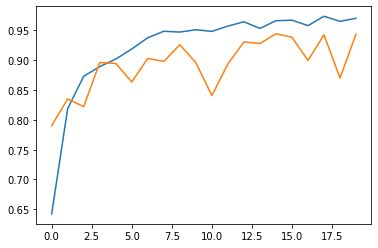

In [51]:
plt.plot(test2.history['accuracy'])
plt.plot(test2.history['val_accuracy'])

# Experiments

In [52]:
# def construct_new_model(i, j, k):
#     model = Sequential()
#     # Dense Adds fully connected nodes in each layer 

#     # Input layer is the number of pixels & their values 

#     # Layer 1
#     model.add(Dense(i, activation = 'relu',input_shape=(784,)))

#     # Layer 2
#     model.add(Dense(i, activation = 'relu'))
    
#     #Output Layer
#     model.add(Dense(10, activation = 'softmax'))
    
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
#     return model

In [53]:
# X = []
# Y = []
# for i in range(250, 2500, 250):
#     Y.append(i)
#     j = 0.1
#     k = 0.9
#     temp_model = get_network_output(construct_new_model(i,j,k), x_train, x_test, y_train, y_test)
#     X.append(temp_model)


In [54]:
#X[0].history['accuracy']

In [41]:
# def build_model():
#   # Specifying a sequential modle 
#     model = Sequential()
    
#     # Dense Adds fully connected nodes in each layer 
#     # Input layer is the number of pixels & their values 
#     # Layer 1
#     model.add(Dense(512, activation = 'relu',input_shape=(784,)))

#     # Layer 2
#     model.add(Dense(512, activation = 'relu'))
    
#     # Output Layer
#     model.add(Dense(10, activation = 'softmax'))
    
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
#     return model

# keras_model2 = build_model()
# keras_model2.fit(x_train, y_train, epochs=10, batch_size=100, verbose=1)

In [42]:
# y_score = keras_model2.predict(x_test)

In [43]:
# y_test.shape

In [44]:
# plotROC(y_test, y_score)